![Machine Learning](http://scikit-learn.org/stable/_static/ml_map.png)

# Machine Learning -

A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if its performance at tasks in T, as measured by P, improves with experience E.

Machine learning is a subfield of artificial intelligence (AI) that provides computers with the ability to learn without being explicitly programmed. Machine learning focuses on the development of computer programs that can change when exposed to new data.

Types of ML:

Machine learning tasks are typically classified into three broad categories, depending on the nature of the learning "signal" or "feedback" available to a learning system. These are

###### Supervised learning:

The computer is presented with example of features and their desired labels/output and the goal is to learn a general rule that maps inputs to outputs.

![title](img/supervised.png)
###### Unsupervised learning:

No labels are given to the learning algorithm, leaving it on its own to find structure in its input. Unsupervised learning can be a goal in itself (discovering hidden patterns in data) or a means towards an end (feature learning).

###### Reinforcement learning:

A computer program interacts with a dynamic environment in which it must perform a certain goal (such as driving a vehicle or playing a game against an opponent) The program is provided feedback in terms of rewards and punishments as it navigates its problem space.

Between supervised and unsupervised learning is semi-supervised learning, where the teacher gives an incomplete training signal: a training set with some (often many) of the target outputs missing. Transduction is a special case of this principle where the entire set of problem instances is known at learning time, except that part of the targets are missing.

![title](img/reinforecement.png)
Another categorization of machine learning tasks arises when one considers the desired output of a machine-learned system.

###### Classification:

Inputs are divided into two or more classes, and the algorithm must produce a model that assigns unseen inputs to one or more  classes. This is typically tackled in a supervised way. Spam filtering is an example of classification, where the inputs are email (or other) messages and the classes are "spam" and "not spam".

###### Regression:

Also a supervised problem, the outputs are continuous rather than discrete.The regression line with muiltvariant features are used to preditive future values.

###### Clustering:

A set of inputs is to be divided into groups. Unlike in classification, the groups are not known beforehand, making this typically an unsupervised task.

###### Density estimation

Finds the distribution of inputs in some space.

###### Dimensionality reduction

Simplifies inputs by mapping them into a lower-dimensional space. Topic modeling is a related problem, where a program is given a list of human language documents and is tasked to find out which documents cover similar topics.

![title](img/hypo.png)


# Classification :

The following are the different types of 

- DecisionTree
- Adaboost
- Navin Gaussian
- SVM
- k-Neighbhor
- Lasso (Feature selection)

# One vs Rest or One vs All 

The above algorithm is implemented by using logistic regression takeing one feature at a time , the probability of given test point is found and the feature with max probability is selected as a predicted feature

![title](img/mulitclass.png)

![title](img/onevsrest.png)



In [4]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [26]:
#Muiltclass with One vs Rest and DecisionTree
'''
This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length,
stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.
'''

from sklearn.datasets import load_iris
import numpy as np
from sklearn import tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC


iris = load_iris()
test_idx=[100,50,100]

#training data
train_target=np.delete(iris.target,test_idx)
train_data=np.delete(iris.data,test_idx,axis=0)
#testing
test_target=iris.target[test_idx]
test_data=iris.data[test_idx]

clf = tree.DecisionTreeClassifier()
clf1=OneVsRestClassifier(LinearSVC(random_state=0))
clf = clf.fit(train_data, train_target)
clf1=clf1.fit(train_data, train_target)
print(clf.predict(test_data))
print(clf1.predict(test_data))



[2 1 2]
[2 1 2]


In [5]:
#Adaboost

import numpy as np
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)

X = np.array(df.drop(['class'], 1)) 
y = np.array(df['class'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)


C:\Users\Sandheep\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.957142857143
[2 2]


0.942857142857
0.942857142857
[2 2]
[2 2]


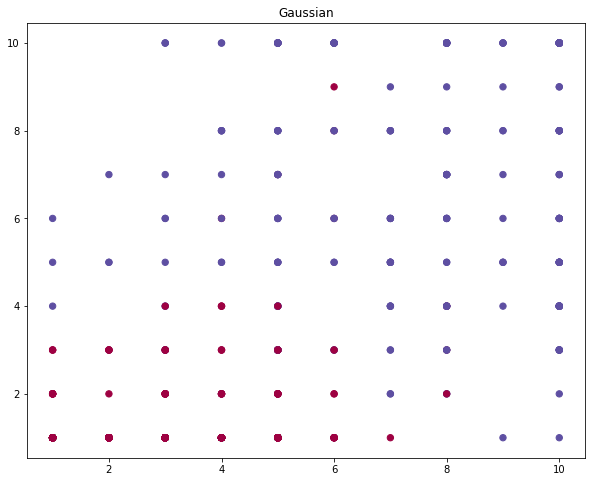

In [3]:
#Gaussian
import matplotlib.pyplot as plt
import matplotlib

import numpy as np
from sklearn import  cross_validation
from sklearn.naive_bayes import GaussianNB
import pandas as pd

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)

X = np.array(df.drop(['class'], 1)) 
y = np.array(df['class'])

plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf = GaussianNB()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

'''
This is especially useful when the whole dataset is too big to fit in memory at once.
This method has some performance and numerical stability overhead,
hence it is better to call partial_fit on chunks of data that are as large as possible
(as long as fitting in the memory budget) to hide the overhead.
'''


clf_pf=GaussianNB()
clf_pf.partial_fit(X_train, y_train,np.unique(y_train))
accuracy1 = clf_pf.score(X_test, y_test)
print(accuracy1)

example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
prediction1 = clf_pf.predict(example_measures)
                                
print(prediction)
print(prediction1)

#plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Gaussian")




In [1]:
#SVM

'''
  Parameters and important points:
  - Margin (Max Distance between two groups ) , this condition is needed for svm
  - kernels (shape of hyperline),linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. 
    If none is given, ‘rbf’ will be used.
  - https://stackoverflow.com/questions/43284811/plot-svm-with-matplotlib 

'''

import numpy as np
from sklearn import svm,cross_validation
import pandas as pd
import matplotlib.pyplot as plt



df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)

X = np.array(df.drop(['class'], 1)) 
y = np.array(df['class'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf=svm.SVC(C=1000,kernel="linear",gamma=1000)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

plt.axis('tight')
#plt.show()



C:\Users\Sandheep\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.921428571429
[2 2]


(-5.7574648868166296,
 10.906762623149229,
 -2.4146832223490415,
 35.99599357468518)

In [2]:
#k-neigbhor

import matplotlib.pyplot as plt
import matplotlib

import numpy as np
from sklearn import preprocessing, cross_validation, neighbors,svm
import pandas as pd


df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)

X = np.array(df.drop(['class'], 1)) 
y = np.array(df['class'])

#plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)


#plot_decision_boundary(lambda x: clf.predict(x))
#plt.title("k-negibhor")


0.971428571429
[2 2]


In [14]:
#lasso


from sklearn import linear_model,cross_validation
import numpy as np
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.data.txt')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)

X = np.array(df.drop(['class'], 1)) 
y = np.array(df['class'])

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

clf = linear_model.Lasso(alpha=0.0001)
clf.fit(X_train, y_train)

example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
prediction1 = clf.predict(example_measures)


print(clf.coef_)
print()
print(clf.score(X_test, y_test))

print(clf.intercept_)


[  8.29101911e-02   3.50028028e-02   6.10972229e-02   3.82489946e-02
   2.53796583e-02   2.81991198e-06   8.22693220e-02   3.76292852e-02
   2.61334332e-03]

0.757440533123
1.45049349509


Logistic regression can also be used to classification ,the cost function is made logit so that we have convex and one global min

![title](logit.png)
![title](logit1.png)

Regression cannot be used in classificaition as shown below 

![title](classific.png)

# Regression :

### Def

Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependent (target) and independent variable (s) (predictor). This technique is used for forecasting, time series modelling and finding the causal effect relationship between the variables. For example, relationship between rash driving and number of road accidents by a driver is best studied through regression.

Regression analysis is an important tool for modelling and analyzing data. Here, we fit a curve / line to the data points, in such a manner that the differences between the distances of data points from the curve or line is minimized. 

Depending upon the problem the number of features set increase ,
for example : house pricing depends on sq area , neigbhor,no. of room etc. similally stock price

Thus, we find a muiltvariant features set model to predict the outcome 

The following are a set of methods intended for regression in which the target value is expected to be a linear combination of the input variables. In mathematical notion, if \hat{y} is the predicted value.

y(w, x) = w_0 + w_1* x_1 + ... + w_p* x_p

Across the module, we designate the vector w = (w_1,..., w_p) as coef_ and w_0 as intercept_

There are multiple benefits of using regression analysis. They are as follows:

### It indicates the significant relationships between dependent variable and independent variable.
### It indicates the strength of impact of multiple independent variables on a dependent variable.

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Regression_Type.png" style="width:600px;height:200px;">

Logistic regression, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

While there might be a temptation to fit a higher degree polynomial to get lower error, this can result in over-fitting. Always plot the relationships to see the fit and focus on making sure that the curve fits the nature of the problem. Here is an example of how plotting can help:

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/underfitting-overfitting.png" style="width:600px;height:200px;">

### Lasso regression:

<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/08/Lasso.png" style="width:600px;height:200px;">
Similar to Ridge Regression, Lasso (Least Absolute Shrinkage and Selection Operator) also penalizes the absolute size of the regression coefficients. In addition, it is capable of reducing the variability and improving the accuracy of linear regression models.  Look at the equation below:

# How to select the right regression model?

Life is usually simple, when you know only one or two techniques. One of the training institutes I know of tells their students – if the outcome is continuous – apply linear regression. If it is binary – use logistic regression! However, higher the number of options available at our disposal, more difficult it becomes to choose the right one. A similar case happens with regression models.

- Data exploration is an inevitable part of building predictive model. It should be you first step before selecting the right model like identify the relationship and impact of variables

- To compare the goodness of fit for different models, we can analyse different metrics like statistical significance of parameters, R-square, Adjusted r-square, AIC, BIC and error term. Another one is the Mallow’s Cp criterion. This essentially checks for possible bias in your model, by comparing the model with all possible submodels (or a careful selection of them).

- Cross-validation is the best way to evaluate models used for prediction. Here you divide your data set into two group (train and validate). A simple mean squared difference between the observed and predicted values give you a measure for the prediction accuracy.

- If your data set has multiple confounding variables, you should not choose automatic model selection method because you do not want to put these in a model at the same time.

- It’ll also depend on your objective. It can occur that a less powerful model is easy to implement as compared to a highly statistically significant model.

- Regression regularization methods(Lasso, Ridge and ElasticNet) works well in case of high dimensionality and multicollinearity among the variables in the data set.

Here are several questions that absolutely need to be answered before making decisions about the algorithm for modeling:

###### What kind of dependency are you expecting to see?

if we are looking at, say, text regression, it's likely that you can get decent results using a linear model. 
But if you are predicting amount of likes from the image source, you will need neural networks.

###### What features do you have? What are their nature, what values can they have, what are their distributions?

For example, tree-based models are exceptionally good with categorical features.

###### What kind of analysis do you need?

If you are going to make a deep, detailed analysis of the learned dependency, you will need a highly interpretable model, say, linear/polynomial regression. It's unlikely that you can visualize a GBM or Neural Network in a comprehensible way.


# Idealogy:

- Linear regression has always convex shape for gradient decent algorithm or anyother 
- Gradient decent has learning rate which is used to find the global local min. of convex starting from any arbitary point in the planeon 
- If learing rate alpha has low value it has slow convergence , if high rate it may not decrease on every iteration may not converge (0.001 or 0.01 is recommended )

![title](img/gradient.png)

![title](img/optimze.png)

# Type of regression :

- LinearRegression
- Lasso, ElasticNet     ( feature selection)
- LogisticRegression    ( binary classification)
- Stepwise Regression   ( multiple independent variables )
- Ridge Regression 
 ( if Data suffers from multicollinearity independent variables are highly correlated ,high variance, added error term
  Ridge regression solves the multicollinearity problem through shrinkage parameter λ (lambda) )

In [54]:
# Muiltvariant linear reg on house pricing in boston 

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_boston
from sklearn.decomposition import PCA

boston=load_boston()
df_x=boston.data
df_y=boston.target

#Dimension reduction 13 to 8 , not a good method but for example is okay
pca = PCA(n_components=8)
pca.fit(df_x)
X = pca.transform(df_x)

reg=linear_model.LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(X,df_y,test_size=0.2,random_state=4)
#x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=4)
reg.fit(x_train,y_train)
#print(reg.coef_)
#a=reg.predict(x_test)
##print(reg.intercept_)
print(reg.coef_.shape)
#print(a)
print("R2 score",reg.score(x_test,y_test))
print(pca.explained_variance_ratio_) 
#print(pca.components_[0])
#plt.scatter(x_train,y_train)
#plt.show()



(8,)
R2 score 0.631798852501
[  8.05814643e-01   1.63050854e-01   2.13486883e-02   6.95695814e-03
   1.30786367e-03   7.27742761e-04   4.20024207e-04   2.48721489e-04]


In [1]:
# Remvoing unwanted features using elasticnet

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_boston
boston=load_boston()
import matplotlib.pyplot as plt
df_x=boston.data
df_y=boston.target
#print(df_y)
#plt.hist(df_y)
#plt.show()

reg=linear_model.ElasticNet()
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.4,random_state=2)
reg.fit(x_train,y_train)
#print(reg.coef_)
#a=reg.predict(x_test)
#print(reg.intercept_)
#print(reg.coef_.shape)
#print(a)
print("R2 score",reg.score(x_test,y_test))




C:\Users\Sandheep\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


R2 score 0.686222493837


In [49]:
# using lasso regression

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.datasets import load_boston
boston=load_boston()
import matplotlib.pyplot as plt
df_x=boston.data
df_y=boston.target
#print(df_y)
#plt.hist(df_y)
#plt.show()

reg=linear_model.Lasso(alpha=0.1)
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.3,random_state=4)
reg.fit(x_train,y_train)
#print(reg.coef_)
#a=reg.predict(x_test)
#print(reg.intercept_)
#print(reg.coef_.shape)
#print(a)
print("R2 score",reg.score(x_test,y_test))
print()






R2 score 0.706617870087



# Regulation 

![title](img/overfitting.png)
![title](img/reg.png)
![title](img/reg1.png)

# Difference between classification and regression :

![title](img/diff_c'n'r.png)

# Evaluation metric

http://scikit-learn.org/stable/modules/model_evaluation.html

# Bias and variance

![title](img/bias_variance.png)

# Dimension Reduction 

- Reason for dimension reduction is not only to compress data for less memory but it is mainly to speed up the training process
 Uses :
 - Compress data 
 - Visulizating data (instead of 50D to 2D z1 and z2)
 
### Principal Components Analysis Algorithm ( IS NOT LINEAR REGRESSION )

- Find the direction of a vector onto which to project the data so as to minimize the projection error or SSE
 it is trying to find lower dimension surface to miniz SSE
  for k-dimension we find u vector to find the plane or whatever 
- It will reject the perdendicular magenta line 
- All the feature are treated equally 

- Only along max variance we can minizime the info lose 
- % PCA is applied only to training set %  

- Used in computer vision (100x100 gives 10,000 dataset of intensity) 
   - Unlabeled input -> PCA ->Z
   - New training set (zi,yi) -> Neural network or logistic reg 
   


### Algrothim :

- Training set
- Mean normalization of set
- If different features on different scale , scale features is done
- Find covariance matrix (sigma)
- Find singular value decompostion [U,S,V]
- Z=(U_reduce)'X  ' is transpose) U_reduce is nxK matrix ( k dimension)

In reducing nD features to kD features , k is called PCA component we have retained
choose k so that 

(Avg. squared SSE/Total Varition ) <=0.01

- "99% variance is retained is another way of saying it "

to implement it 
- choose k 
1 - Sigma(S till k)/sigma(S till n) <=0.01  ( S is from svd s is a diagonal matrix)
- till <=0.01 do this 


### Overfitting

- It is important to note that PCA is used only for and not for overfitting problem , to solve overfitting use regulazition 
- PCA uses only x and not y labels so it may throw out some useful data

### When to use PCA

- It is recommanded to run the dataset without PCA first if that did not satify speed or compress data for memory or something     use PCA

### Example :

 See linear reg first example


![title](img/PCA.png)



# Time Series:

Time Series :


 - Time series provide the opportunity to forecast future values. Based on previous values, time series can be used to forecast trends in economics, weather, and capacity planning, to name a few. The specific properties of time-series data mean that specialized statistical methods are usually required.
 
 - One of the methods available in Python to model and predict future points of a time series is known as SARIMAX, which stands for Seasonal AutoRegressive Integrated Moving Averages with eXogenous regressors. Here, we will primarily focus on the ARIMA component, which is used to fit time-series data to better understand and forecast future points in the time series.
 
 -  seasonality: does the data display a clear periodic pattern?
 trend: does the data follow a consistent upwards or downward slope?
 noise: are there any outlier points or missing values that are not consistent with the rest of the data?

or 

 - A time series is a sequence of observations taken sequentially in time.
 - Regular dataset is must in time series in order to predict or else u might get wrong results 
 - Time series is used in stocks,natural pheno like wind,hearbeat,power station demands which all varies with time 
 - To predict the future for few days say the present value must be correlated with past 
 - Random generator cant predict future
  
http://machinelearningmastery.com/time-series-forecasting/  

Example : Milk production
 - Lets Decompose the time series graph into general trend,peroidic /sequtional and remainder
 
 DECOMPOSE
 ---------------
  1)Loess Regression (window m width)

 - Define the window width m (should be less than 0.05 of ur dataset)ie in plot we select width of 0.05 and trace the trend 
 - Choose a weight function like triweight (1-u^2)^3 mod[u]>=1 else 0 
 - Do regression using polynomial terms from taylor series by selecting a time and sub it from the center of the window time t0 
 - The point near the center are given more weight 
 - choose losee regression papameter m so as to get soomth curve or else you get a straight line 

 2)
 Model Average method 

 -In a perodic wave select the period and find the trend from previous ten values and plot the trend 
 -Auto correlation plot of avg model gives sharp cutoff n tell the order of model 

 Xt=Et+O*Et-1+O*Et-2+... 
 example: 
 companys aunoment , and stock varition for few days 


3)
 STL -

 - it uses both losee and moving average method to find trend and periodic signals and it gets the remainder .
  - see picture


 Stationarity-

 - if Time series that has no trends is it stationary 
 - second order stationarity 
    mean const
    variance const
    autocovariance does not depend on time 

checking mean and variance graphly 

- create a box plot of regular time plot using R language
- looking at the box plot ,the box shld not vary so as to keep mean n variance const


 4)Auto Regressive Model
 
  -They are not always stationary if coeff >1 it has expo autocorrection if coeff<1 it is stationary 
  -There autocorrection is expo for stationary proces so it difficult to predict the order from data plot 
  - So we use partical autocorrelation 
  - which gives relation between Xt and Xt-2 alone leaving other team in term of it 
  
  
  5)ARMA
  
   - It uses both auto-reg and avg method 
   - Only for complex higer-order behaviour it is used  


  6)Difference:

  - Xt-X(t-1)=Et gives us the error term which is stationary 
  - so by differencing we convert non-stationary process to stationary

  7)ARIMA:
  
  -One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for AutoregRessive Integrated Moving Average. ARIMA is a model that can be fitted to time series data in order to better understand or predict future points in the series.

There are three distinct integers (p, d, q) that are used to parametrize ARIMA models. Because of that, ARIMA models are denoted with the notation ARIMA(p, d, q). Together these three parameters account for seasonality, trend, and noise in datasets:

- p is the auto-regressive part of the model. It allows us to incorporate the effect of past values into our model. Intuitively, this would be similar to stating that it is likely to be warm tomorrow if it has been warm the past 3 days.

- d is the integrated part of the model. This includes terms in the model that incorporate the amount of differencing (i.e. the number of past time points to subtract from the current value) to apply to the time series. Intuitively, this would be similar to stating that it is likely to be same temperature tomorrow if the difference in temperature in the last three days has been very small.

- q is the moving average part of the model. This allows us to set the error of our model as a linear combination of the error values observed at previous time points in the past.
  
    When dealing with seasonal effects, we make use of the seasonal ARIMA, which is denoted as ARIMA(p,d,q)(P,D,Q)s. Here, (p, d, q) are the non-seasonal parameters described above, while (P, D, Q) follow the same definition but are applied to the seasonal component of the time series. The term s is the periodicity of the time series (4 for quarterly periods, 12 for yearly periods, etc.).

The seasonal ARIMA method can appear daunting because of the multiple tuning parameters involved. In the next section, we will describe how to automate the process of identifying the optimal set of parameters for the seasonal ARIMA time series model.
  
  




Our primary concern is to ensure that the residuals of our model are uncorrelated and normally distributed with zero-mean

Ref:

https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3#step-6-—-validating-forecasts

https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:6787.343624045498
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1596.7111727641307
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1058.9388921320026
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1056.2878500246952
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1361.6578978072075
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1044.7647912894922
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:6881.048755126321
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6072.662327375734
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1379.1941067330986
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1241.417471690003
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1082.2618354804601
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:780.431571168119
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1119.5957893630987
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:807.0912988165787
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1240.2211199194062
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:337.79385490535475
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:619.9501759055394
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:376.9283760499742
A

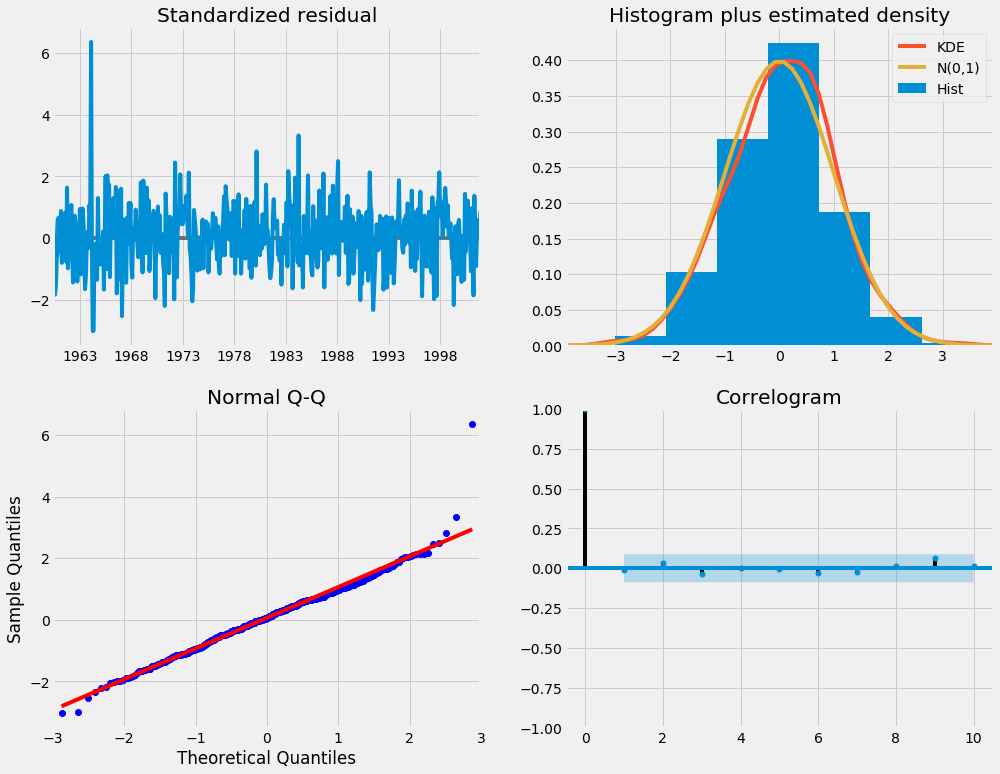

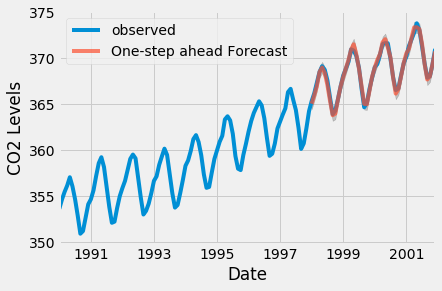

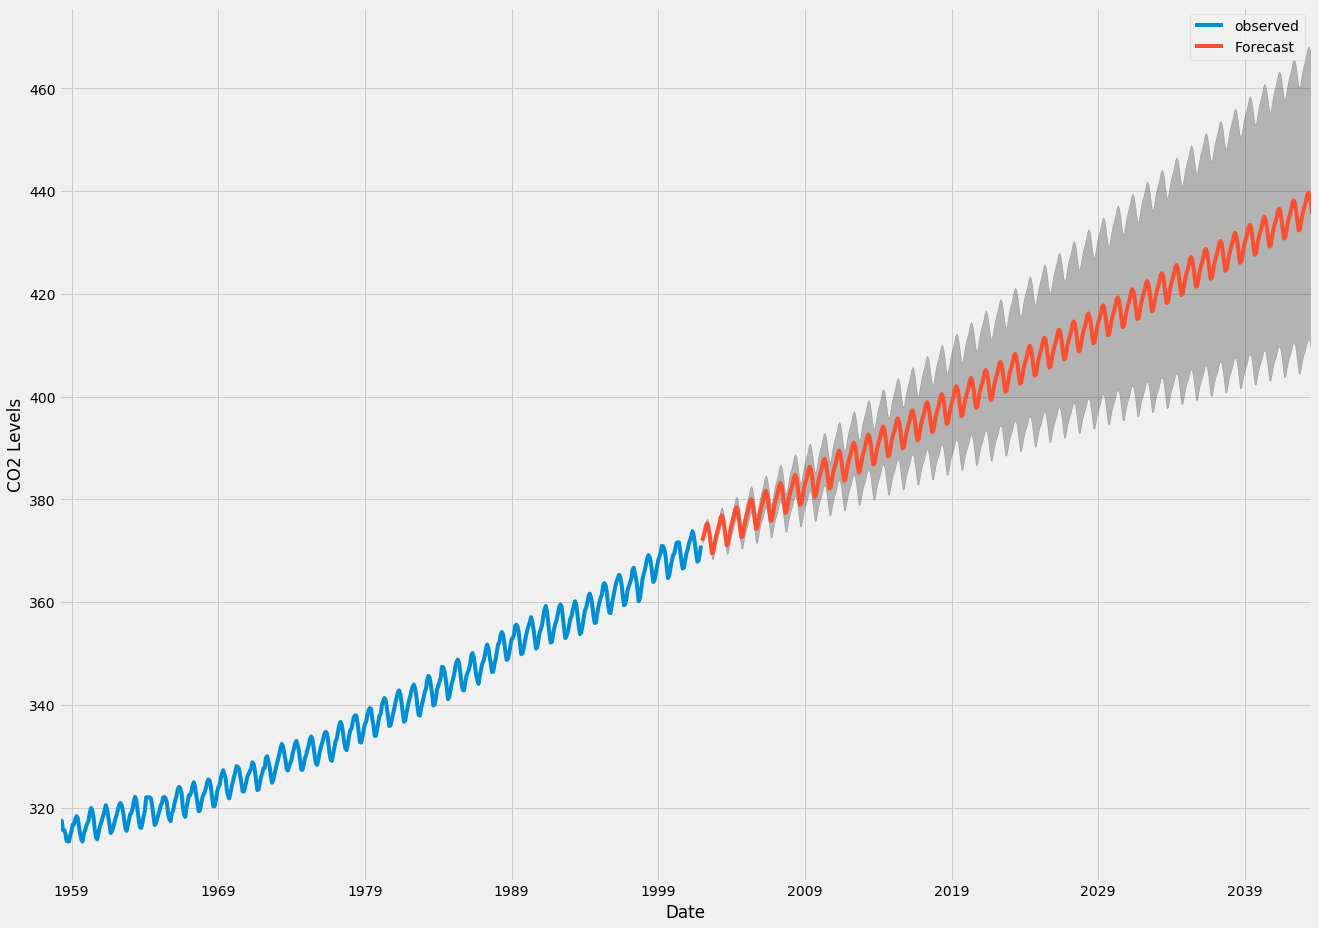

In [53]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

data = sm.datasets.co2.load_pandas()
y = data.data

# The 'MS' string groups the data in buckets by start of the month
y = y['co2'].resample('MS').mean()

# The term bfill means that we use the value before filling in missing values
y = y.fillna(y.bfill())

#print(y)

#y.plot(figsize=(15, 6))
#plt.show()

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue
            
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

results.plot_diagnostics(figsize=(15, 12))
plt.show()


pred = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()
plt.show()

# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()
